In [1]:
# !pip install pyyaml==5.1
# !pip install "git+https://github.com/facebookresearch/detectron2.git"

In [2]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

torch:  1.10 ; cuda:  1.10.1
detectron2: 0.6


'nvcc' is not recognized as an internal or external command,
operable program or batch file.


Import Detectron

In [3]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import cv2

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [4]:
from detectron2.data.datasets import register_coco_instances

train_data_path = r"""D:\xing-vimentin-dic-pipeline\src\cxa_segmentation\cxa-data\nandita_google_drive_files\Pittsburg University - Xing Lab\Collab_data\data"""
train_json_path = r"""D:\xing-vimentin-dic-pipeline\src\cxa_segmentation\cxa-data\nandita_google_drive_files\Pittsburg University - Xing Lab\coco_format\train.json"""

val_data_path = r"""D:\xing-vimentin-dic-pipeline\src\cxa_segmentation\cxa-data\nandita_google_drive_files\Pittsburg University - Xing Lab\Collab_data\data"""
val_json_path = r"""D:\xing-vimentin-dic-pipeline\src\cxa_segmentation\cxa-data\nandita_google_drive_files\Pittsburg University - Xing Lab\coco_format\val.json"""
register_coco_instances("deepfashion_train", {}, train_json_path, train_data_path)
register_coco_instances("deepfashion_val", {}, val_json_path, val_data_path)

## Detectron config

In [5]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("deepfashion_val",)
cfg.DATASETS.TEST = ()
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo

cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 300
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 13

cfg.TEST.EVAL_PERIOD = 500

In [6]:
import torch
print(torch.version)
print(torch.cuda.is_available())

<module 'torch.version' from 'c:\\Users\\dummy\\Anaconda3\\envs\\cv-general\\lib\\site-packages\\torch\\version.py'>
True


In [7]:
from detectron2.engine import DefaultPredictor
from detectron2.engine import DefaultTrainer
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=True)
trainer.train()

[08/25 00:37:30 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (14, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (14,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (52, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (52,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (13, 256, 1, 

[08/25 00:37:30 d2.engine.train_loop]: Starting training from iteration 0


c:\Users\dummy\Anaconda3\envs\cv-general\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[08/25 00:38:45 d2.utils.events]:  eta: 0:14:33  iter: 19  total_loss: 6.325  loss_cls: 2.721  loss_box_reg: 0.765  loss_mask: 0.6928  loss_rpn_cls: 1.69  loss_rpn_loc: 0.4074  time: 3.1951  data_time: 0.3481  lr: 6.427e-05  max_mem: 3185M
[08/25 00:39:35 d2.utils.events]:  eta: 0:12:05  iter: 39  total_loss: 3.16  loss_cls: 1.155  loss_box_reg: 0.7006  loss_mask: 0.6784  loss_rpn_cls: 0.1212  loss_rpn_loc: 0.4462  time: 2.8274  data_time: 0.0025  lr: 0.00013087  max_mem: 3185M
[08/25 00:40:33 d2.utils.events]:  eta: 0:11:11  iter: 59  total_loss: 2.901  loss_cls: 0.9547  loss_box_reg: 0.8089  loss_mask: 0.645  loss_rpn_cls: 0.07204  loss_rpn_loc: 0.4118  time: 2.8509  data_time: 0.0024  lr: 0.00019747  max_mem: 3185M
[08/25 00:41:35 d2.utils.events]:  eta: 0:10:43  iter: 79  total_loss: 2.565  loss_cls: 0.7647  loss_box_reg: 0.8208  loss_mask: 0.5961  loss_rpn_cls: 0.04963  loss_rpn_loc: 0.359  time: 2.9138  data_time: 0.0027  lr: 0.00026407  max_mem: 3185M
[08/25 00:42:41 d2.utils.ev

In [ ]:
%tensorboard --logdir output

In [9]:
cfg.OUTPUT_DIR = "./detectron_run0_output/"
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.55   # set the testing threshold for this model
cfg.DATASETS.TEST = ("deepfashion_val", )
predictor = DefaultPredictor(cfg)

[08/29 07:31:45 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

In [35]:
def normalize_img_by_zscore(img: np.array):
    """calculate z score of img and normalize to range [0, 255]

    Parameters
    ----------
    img : np.array
        _description_

    Returns
    -------
    _type_
        _description_
    """
    img = (img - np.mean(img.flatten()))/np.std(img.flatten())
    img = img + abs(np.min(img.flatten()))
    img = img / np.max(img) * 255
    return img

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models
from cellpose.io import imread
import glob
from pathlib import Path
from PIL import Image, ImageSequence
from tqdm import tqdm
import os
import os.path
import livecell_segment.datasets

# dir_path = Path('D:\\xing-vimentin-dic-pipeline\\src\\cxa_segmentation\\cxa-data\\june_2022_data\\day0_Notreat_Group1_wellA1_RI_MIP_stitched')
dir_path = Path('D:\\xing-vimentin-dic-pipeline\\src\\cxa_segmentation\\cxa-data\\june_2022_data\\day0_Notreat_Group1_wellA1_RI_MIP_stitched')
imgs = livecell_segment.datasets.LiveCellImageDataset(dir_path, ext="tif")

120 tif img file paths loaded: 


In [61]:
img1 = imgs[100][:, :, np.newaxis]
img1 = normalize_img_by_zscore(img1)
img2 = cv2.imread(r"D:\xing-vimentin-dic-pipeline\src\cxa_segmentation\cxa-data\nandita_google_drive_files\Pittsburg University - Xing Lab\Collab_data\data\100th_1.png")
# outputs

In [62]:
img = img1

def detectron_predict_single_img(img):
    outputs = predictor(img)
    return outputs

def detectron_visualize_img(img):
    outputs = detectron_predict_single_img(img)
    v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    figure = plt.figure(figsize=(8, 6), dpi=80)
    plt.imshow(v.get_image()[:, :, ::-1])

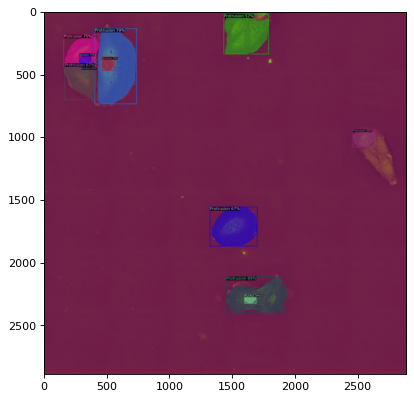

In [63]:
detectron_visualize_img(img1)

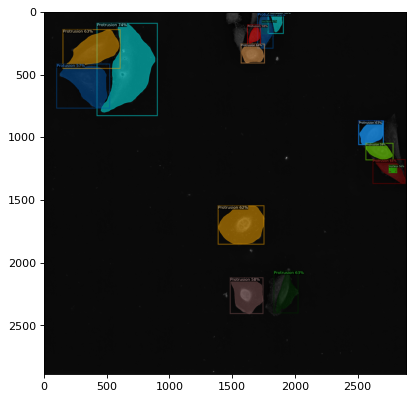

In [64]:
detectron_visualize_img(img2)